
Ce notebook a pour but de réaliser une analyse numérique des équations du mouvement d'un pendule double.  En effet, ces équations ne sont pas résolubles de manières analytiques, c'est donc le seul moyen de pouvoir connaître la position de notre système en fonction du temps.  
Pour cela nous devrons faire appel à une amélioration de la méthode d'Euler, appelée Runge-Kutta d'ordre 4 (RK4) car le pendule double a un régime chaotique, c'est à dire que son état à un moment donné dépend très fortement de son état initial et que donc chaque erreur dans la donnée de l'état du pendule dans l'espace des phases à un instant donné aura de grosses répercussions dans les valeurs suivantes.  La RK-4 permet d'améliorer la précisions de la méthode numérique et donc augmente la fiabilité des valeurs obtenues. 

Les coordonnées des centres de masses des deux barreaux peuvent s'écrire en fonction de l, $\theta_1$ et $\theta_2$ : 

$X_1= \frac{l}{2}  sin (\theta_1)$ 

$Y_1=\frac{-l}{2}  cos (\theta_1)$   

$X_2= l (sin(\theta_1) + \frac{l}{2} sin (\theta_2)) $ 

$Y_2=-l (cos(\theta_1) + \frac{l}{2}cos (\theta_2))$


On peut alors écrire le lagrangien $L=T-V$ en fonction des des nos coordonnées généralisées, il s'en suit que :
Comme 
$L=\frac{1}{6}ml^2 ((\dot \theta_2)^2 +4(\dot\theta_1)^2+3\dot \theta_1 \dot \theta_2 cos (\theta_1 -\theta_2)) + \frac{1}{2}mgl(3cos(\theta_1)+cos\theta_2)$




Par définition des impulsions $p_1$ et$p_2$ comme étant les dérivées du lagrangien par rapport à $\dot\theta_1$ et $\dot\theta_2$ respectivement, on a 




$\dot \theta_1 =\frac{6}{ml^2} \frac{2p_1  - 3cos(\theta_1-\theta_2)p_2}{16-9cos^2(\theta_1 - \theta_2)}$ 

$\dot \theta_2 =\frac{6}{ml^2} \frac{8p_2  - 3cos(\theta_1-\theta_2)p_1}{16-9cos^2(\theta_1 - \theta_2)}$

 Ensuite par les équations de Lagrange, on a également  

$\dot p_1 = - \frac{1}{2}ml^2 (\dot\theta_1 \dot\theta_2 sin (\theta1-\theta2)+3\frac{g}{l}sin\theta_1$

$\dot p_2 = - \frac{1}{2}ml^2 (-\dot\theta_1 \dot\theta_2 sin (\theta1-\theta2)+\frac{g}{l}sin\theta_2$

Avec ces 4 équations et ainsi que nos conditions initiales sur $\theta_1$,$\theta_2$,$p_1$ et $p_2$, nous allons pouvoir appliquer la méthode RK4.












In [1]:

import numpy
from matplotlib import pyplot
%matplotlib inline



In [2]:


from matplotlib import animation
from IPython.display import HTML
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

In [3]:
import math
import numpy 
from matplotlib import pyplot
%matplotlib inline


Ici on définit les paramètres ainsi que les valeurs initiales de notre pendule double.

In [4]:
m = 1.0
g = 9.81
L = 1.0 # attention ceci correspond au petit l dans l'introduction


theta1_0 = numpy.pi/2
theta2_0 = numpy.pi/2
p1_0 = 0.0
p2_0 = 0.0

La méthode RK4 classique est décrite est décrite sur Wikipédia (voir dans les sources) 

Ici, nous avons du un peu modifier cette méthode.  En effet, ce qui nous intéresse c'est de pouvoir connaître les coordonnées 
$(\theta_1,\theta_2)$ pour chaque instant dans le temps séparé de dt = 0,001 s et d'arriver ainsi par étape jusqu'à t=20s. 
Le problème c'est qu'ici dans les expressions de $\dot\theta1$ et $\dot\theta_2$, il apparaît les variables $\theta_1$,$\theta_2$, $p_1$ et $p_2$.
Il faudra donc également à chaque étape après avoir déterminé les valeurs de $(\theta_1,\theta_2)$ pour le temps t+dt également déterminer celle de $p_1$ et $p_2$ au même instant t+dt.

Ici on définit une fonction rhs_double_pendule qui assigne les différentes valeurs des k1,k2,k3,k4 pour chacunes de nos variables $\theta_1, \theta_2, p_1, p_2$

In [5]:
def rhs_double_pendule (u, m, L, dt):
    
    theta1, theta2, p1, p2 = u
    
    k1th1 = (6/(m*(L**2))) * ((2 * p1 - 3 * math.cos(theta1 - theta2) * p2)/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k1th2 = (6/(m*(L**2))) * ((8 * p2 - 3 * math.cos(theta1 - theta2) * p1)/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k1p1 = -(1/2) * m*(L**2)*(k1th1 * k1th2 * math.sin(theta1 - theta2) + 3 * (g/L) * math.sin(theta1))
    k1p2 = -(1/2) * m*(L**2)*(-k1th1 * k1th2 * math.sin(theta1 - theta2) +  (g/L) * math.sin(theta2))                       #nous calculons les k1 pour chacunes des variables, nous utiliserons ces derniers pour calculer les différents k2
    k2th1 = (6/(m*(L**2))) * ((2 * (p1 + (dt/2)*k1p1) - 3 * math.cos((theta1 + (dt/2)*k1th1) - (theta2 + (dt/2)*k1th2 )) * (p2 + (dt/2)*k1p2))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k2th2 = (6/(m*(L**2))) * ((8 * (p2 + (dt/2)*k1p2) - 3 * math.cos((theta1 + (dt/2)*k1th1 ) - (theta2 +(dt/2)*k1th2 )) * (p1 + (dt/2)*k1p1))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k2p1 = -(1/2) * m*(L**2)*(k2th1 * k2th2* math.sin((theta1 +(dt/2)*k1th1 ) - (theta2 + (dt/2)*k1th2)) + 3 * (g/L) * math.sin(theta1))
    k2p2 = -(1/2) * m*(L**2)*(-k2th1 * k2th2 * math.sin((theta1 +(dt/2)*k1th1 ) - (theta2 + (dt/2)*k1th2)) +  (g/L) * math.sin(theta2))                                                     #nous calculons les k2 pour chacunes des variables,
    k3th1 = (6/(m*(L**2))) * ((2 * (p1 + (dt/2)*k2p1) - 3 * math.cos((theta1 + (dt/2)*k2th1 ) - (theta2 + (dt/2)*k2th2)) * (p2 + (dt/2)*k2p2))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))#nous utiliserons ces derniers pour calculer les différents k3
    k3th2 = (6/(m*(L**2))) * ((8 * (p2 + (dt/2)*k2p2 ) - 3 * math.cos((theta1 + (dt/2)*k2th1) - (theta2 + (dt/2)*k2th2)) * (p1 + (dt/2)*k2p1))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k3p1 =  -(1/2) * m*(L**2)*(k3th1 * k3th2 * math.sin((theta1 + (dt/2)*k2th1) - (theta2 + (dt/2)*k2th2)) + 3 * (g/L) * math.sin(theta1))
    k3p2 = -(1/2) * m*(L**2)*(-k3th1 * k3th2 * math.sin((theta1 + (dt/2)*k2th1) - (theta2 + (dt/2)*k2th2)) +  (g/L) * math.sin(theta2))                                         #nous calculons les k3 pour chacunes des variables
    k4th1 = (6/(m*(L**2))) * ((2 * (p1 + dt * k3p1) - 3 * math.cos((theta1 + dt*k3th1) - (theta2 + dt * k3th2)) * (p2 + dt * k3p2))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))#nous utiliserons ces derniers pour calculer les différents k4
    k4th2 = (6/(m*(L**2))) * ((8 * (p2 + dt * k3p2) - 3 * math.cos((theta1 + dt * k3th1) - (theta2 + dt * k3th2)) * (p1 + dt * k3p1))/(16.0 - 9 * (math.cos(theta1 - theta2))**2))
    k4p1 = -(1/2) * m*(L**2)*(k4th1 * k4th2 * math.sin((theta1 + dt * k3th1) - (theta2 + dt * k3th2)) + 3 * (g/L) * math.sin(theta1))
    k4p2 = -(1/2) * m*(L**2)*(-k4th1 * k4th2 * math.sin((theta1 + dt * k3th1) - (theta2 + dt * k3th2)) +  (g/L) * math.sin(theta2))                        #nous calculons les k4 pour chacunes des variables
    
    rhs = numpy.array([ k1th1 + 2 * k2th1 + 2* k3th1 + k4th1  ,k1th2 + 2 * k2th2 + 2* k3th2 + k4th2   ,k1p1 + 2 * k2p1 + 2* k3p1 + k4p1   , k1p2 + 2 * k2p2 + 2* k3p2 + k4p2 ])
    return rhs 

Cette fonction nous donne un tableau que nous utiliserons pour définir une fonction qui nous donnera la postion du pendule double à chaque étape dt.

In [6]:
def step (f, u,dt, *args):
    u_new = u + (dt/6) * f(u,*args,dt)
    return u_new

Nous avons ici une fonction step qui ,pour chaque position du pendule double à un instant t, nous donnes une nouvelle position à l'instant t+dt.

In [7]:
T = 20.0 # durée de l'observation
dt = 0.001 # le pas
N = int(T/dt) + 1 #nombre d'étapes dans le temps
u = numpy.empty((N,4)) # on crée un tableau vide que l'on va remplir

u[0] = numpy.array([theta1_0, theta2_0, p1_0, p2_0 ]) # on donne notre point de départ c'est-à-dire les positions initiales

for n in range (N-1):
    u[n + 1] = step (rhs_double_pendule,u[n],dt,m,L) # on remplit notre tableau en utilisant notre fonction step définit précédemment
    


In [8]:
x1_values = numpy.empty(N) #on crée 4 tableaux vides
x2_values = numpy.empty(N)
y1_values = numpy.empty(N)
y2_values = numpy.empty(N)
for n in range (N) :  #on remplit les 4 tableaux avec les positions du bout du pendule1 (x1,y1) et du pendule2 (x2,y2) à chaque instant
    x1_values[n] = L * math.sin(u[n,0])
    x2_values[n] = x1_values[n] + L * math.sin(u[n,1])
    y1_values[n] = -L * math.cos(u[n,0])
    y2_values[n] = y1_values[n] - L * math.cos(u[n,1])
    
x1 = x1_values[N-1]
y1 = y1_values[N-1]
x2 = x2_values[N-1]
y2 = y2_values[N-1]
print ('la position du bout du pendule1 à 2O secondes est donnée par ')
print ('x1={:.3f}' .format(x1)) 
print ('y1 = {:.3f}'.format(y1))
print ('la position du bout du pendule2 à 2O secondes est donnée par ')
print ('x2={:.3f}' .format(x2)) 
print ('y2 = {:.3f}'.format(y2))

la position du bout du pendule1 à 2O secondes est donnée par 
x1=-0.609
y1 = -0.793
la position du bout du pendule2 à 2O secondes est donnée par 
x2=0.391
y2 = -0.765


Nous avons maintenant les positions du bout des pendules à chaque instant nous allons par la suit créer un graphique qui relira le bout du premier pendule à l'origine et le bout du deuxième pendule à l'extrémité du premier. Nous créons ici 4 tableaux qui contiennent les coordonnées des extrémités des pendules ainsi qua les coordonnées du point auxquel il sont attachés.

In [9]:
px1 = numpy.empty((N,2))# nous retrouvons donc ici toute les valeurs de x1 au court du temps avec les coordonnées de l'origine
py1 = numpy.empty([N,2])# nous retrouvons donc ici toute les valeurs de y1 au court du temps avec les coordonnées de l'origine
px2= numpy.empty((N,2))# nous retrouvons donc ici toute les valeurs de x2 au court du temps avec les coordonnées de x1
py2 = numpy.empty([N,2])# nous retrouvons donc ici toute les valeurs de y2 au court du temps avec les coordonnées de y1
for n in range (N):
    px1[n,0] = 0.0
    px1[n,1] = x1_values[n]
    py1[n,0] = 0.0
    py1[n,1] = y1_values[n]
    px2[n,1] = x2_values[n]
    px2[n,0] = x1_values[n]
    py2[n,1] = y2_values[n]
    py2[n,0] = y1_values[n]


Nous allons maintenant construire notre animation pour se faire nous alllons construire un graphique et le mettre "à jour" à chaque instant et en faire une animation.

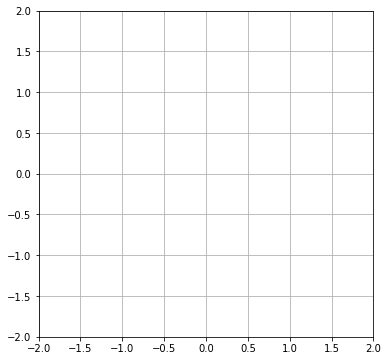

In [10]:
# nous allons ici donner les bases de notre animation
fig = plt.figure(figsize = (6.0,6.0))

ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
ax.grid()
line1, = ax.plot([], [])
line2, = ax.plot([], [])

Nous allons maintenant créer des fonctions qui vont remettre le graphique "à jour" à chaque instant. 

In [11]:

def init():
    line1.set_data([], [])
    line2.set_data([],[])
    return line1,line2

# cette fonction est appellée à chaques instants pour créer le graphique
def animate(i):
  
    line1.set_data(px1[i], py1[i])
    line2.set_data(px2[i],py2[i])
    return line1,line2


In [12]:
# on appelle la fonction qui va mettre tout ça en mouvement la partie blit = True signifi qu'ill ne faut redessiner que les points qui ont changés
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=1, blit=True)



plt.show()

In [ ]:


# on affiche la vidéo
HTML(anim.to_html5_video())



Nous allons maintenant nous intéresser à l'ordre de convergence.  Pour cela il nous faut d'abbord reprocéder à la méthode RK4 pour differents pas tel que $(dt)_k = (dt)_n r$ 
où $k = n+1$

Nous allons donc ici créer un tableau qui contiendra nos solutions pour chaque pas différents.

In [ ]:

dt_values = [0.004, 0.002, 0.001, 0.0005, .00025]# on pose les différents pas


u_values = []# on crée un tableau vide qui contiendra les solutions pour chaque pas

for dt in dt_values:# nous allons réutilisé la fonction step pour chaque valeurs de dt_values et les mettres dans un tableau
    N = int(T / dt) + 1  # nombre de sauts dans le temps 
  
    u = numpy.empty((N, 4))
    
    u[0] = numpy.array([theta1_0, theta2_0, p1_0, p2_0])# on pose les conditions initiales
   
    for n in range(N - 1):     # nous allons réutilisé la fonction step pour chaque valeurs de dt_values et les mettres dans un tableau
        u[n + 1] = step (rhs_double_pendule,u[n],dt,m,L)
    
    u_values.append(u)
    

Nous allons maintenant définir une fonction qui aura pour rôle de représenter la différence entre deux résultats obtenus pour le même système avec la même méthode (RK4) mais avec des pas différents. Pour se faire il faut prendre en compte que plus la précision est grande plus le nombre de points l'est aussi. Nous tiendrons donc compte du ratio entre les différentes dt_values.

In [ ]:
def l1_diff(u_coarse, u_fine, dt):

    N_coarse = len(u_coarse)#nombre d'éléments de u_coarse
    N_fine = len(u_fine)#nombre d'élément de u_fine
    ratio = math.ceil(N_fine / N_coarse)#nous dnne le ratio entre N_coarse et N_fine
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))# c'est lors de cette somme qu'il est important de faire attention au ratio
    return diff

In [ ]:


# nous créons maintenant un tableau vide que l'on va remplir avec les différences calculées précédement
diff_values = []

for i, dt in enumerate(dt_values[:-1]):# on remplis le tableau
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

Afin de pouvoir observer quelque chose nous utiliserons la fonction loglog()

In [ ]:


# nous faisons un graphique de la différence en fonction des dt_values
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm difference en fonction du pas') # on pose le titre
pyplot.xlabel('$\Delta t$')  # on pose le nom des abscisses
pyplot.ylabel('Difference')  # on pose le nom des ordonnées

pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  
pyplot.axis('equal');  # on met les axes à la même échelle



Nous allons maintenant calculer l'ordre de convergence. 

l'odre de convergence est donné par $p = \frac{log(\frac{f_3 - f_2}{f_2-f_1})}{log (r)} $.

In [ ]:


r = 2  # ratio de raffinement des intervalles dt
h = 0.001  # dt le plus précis

dt_values2 = [h, r * h, r**2 * h]#on crée un tableau avec nos valeurs de dt
u_values2 = []# on crée un tableau vide que l'on remplira 

for dt in dt_values2:#cette boucle va remplir u_values avec des tableaux u que nous allons créer
    N = int(T / dt) + 1  # nombre de sauts dans le temps
   
    u = numpy.empty((N, 4))#on crée un tableau vide qui reprendra les soltuions à chaque dt
    
    u[0] = numpy.array([theta1_0, theta2_0, p1_0, p2_0])# on pose les conditions initiales
  
    for n in range(N - 1):#on rempli les tableaux u pour chaque dt
        u[n + 1] = step (rhs_double_pendule,u[n],dt,m,L)
  
    u_values2.append(u)#on rajoute chaque tableau u l'un après l'autre

# on calcule f1-f2
f2_f1 = l1_diff(u_values2[1][:, 2], u_values2[0][:, 2], dt_values2[1])
# on calcul f3 - f2.
f3_f2 = l1_diff(u_values2[2][:, 2], u_values2[1][:, 2], dt_values2[2])
# on calcul l'ordre de convergence.
p = math.log(f3_f2 / f2_f1) / math.log(r)
print('ordre de convergence observé: p = {:.3f}'.format(p))






Nous avons vu dans le cours que pour la méthode d'Euler, on obtient un résultat proche de 1.  Ici, on obtient un résultat de $p\simeq 0,7$.
On peut interpreter cela comme le fait que le taux de diminution des différences entre les résultats définis plus haut (en fonction du dt utilisé) est plus faible que r c'est à dire le taux de raffinement du maillage.
On conclu que la fiabilité de la méthode RK4 est donc meilleure que celle de la méthode d'Euler pour un même pas dt donné. 
